In [25]:
using EpidemicSimulations
using LightGraphs
using Colors
using Plots
using GraphPlot, Compose, Cairo, Fontconfig

In [29]:
# G = watts_strogatz(n_nodes, 4, 0.2)
# G = barabasi_albert(n_nodes, 1, seed=20)
# G = erdos_renyi(n_nodes, 0.3, seed=77)

# G = static_scale_free(n_nodes, Int(n_nodes * 2.7), 2.5)
# G = static_scale_free(n_nodes, n_nodes * 2, 2.5)

In [19]:
n_nodes = 200
n_steps = 50

G = watts_strogatz(n_nodes, 4, 0.2)
# G = static_scale_free(n_nodes, n_nodes * 2, 2.5)

m = SIR()
initialise!(m, G, n_steps)
simulate!(m)

In [17]:
cmap = Dict{Symbol, RGB}(
    :susceptible => RGB(0.2, 0.4, 1.0),
    :infected => RGB(1.0, 0.3, 0.3),
    :recovered => RGB(0.2, 0.8, 0.2)
)

Dict{Symbol,RGB} with 3 entries:
  :recovered   => RGB{Float64}(0.2,0.8,0.2)
  :infected    => RGB{Float64}(1.0,0.3,0.3)
  :susceptible => RGB{Float64}(0.2,0.4,1.0)

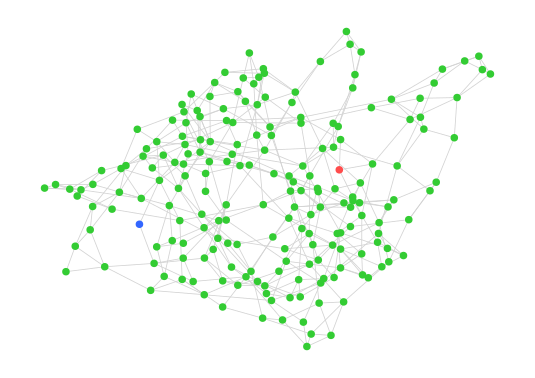

In [20]:
loc_x, loc_y = spring_layout(m.G)

for i=1:n_steps
    IJulia.clear_output(true)
    p = gplot(m.G, loc_x, loc_y, nodefillc=get_state_colours(m, cmap, i))
    p |> display
    sleep(0.3)
    if sum(m.states[:infected], dims=1)[i] == 0
        break
    end
end

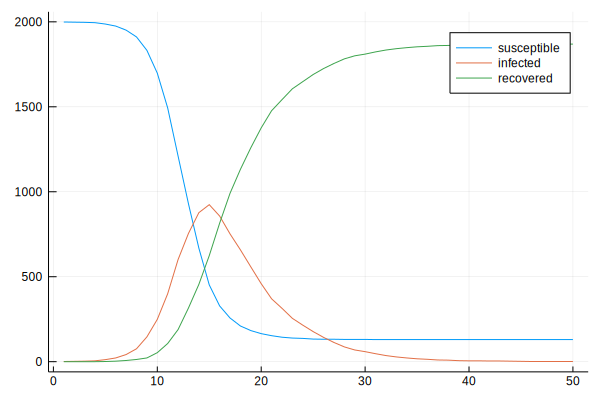

In [17]:
plot(vec(sum(m.states[:susceptible], dims=1)), label=:susceptible)
plot!(vec(sum(m.states[:infected], dims=1)), label=:infected)
plot!(vec(sum(m.states[:recovered], dims=1)), label=:recovered)

In [28]:
output_path = "c:/workspace/EpidemicSimulations.jl/output/"

loc_x, loc_y = spring_layout(m.G)

open("$output_path/images.txt", "w") do io
    for i in 1:m.n_steps
        write(io, "$output_path/$i.png\n")
    end
end   

for i=1:m.n_steps
    draw(
        PNG("$output_path/$i.png", 15cm, 15cm),
        gplot(m.G, loc_x, loc_y, nodefillc=get_state_colours(m, cmap, i))
    )
end

In [19]:
n_nodes = 1000
n_steps = 30

# G = watts_strogatz(n_nodes, 4, 0.2)
G = static_scale_free(n_nodes, n_nodes * 2, 2.5)

m = SIS()
initialise!(m, G, n_steps)
simulate!(m)

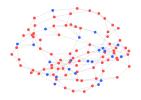

In [7]:
loc_x, loc_y = spring_layout(m.G)

for i=1:m.n_steps
    IJulia.clear_output(true)
    p = gplot(m.G, loc_x, loc_y, nodefillc=get_state_colours(m, cmap, i))
    p |> display
    sleep(0.3)
    if sum(m.states[:infected], dims=1)[i] == 0
        break
    end
end

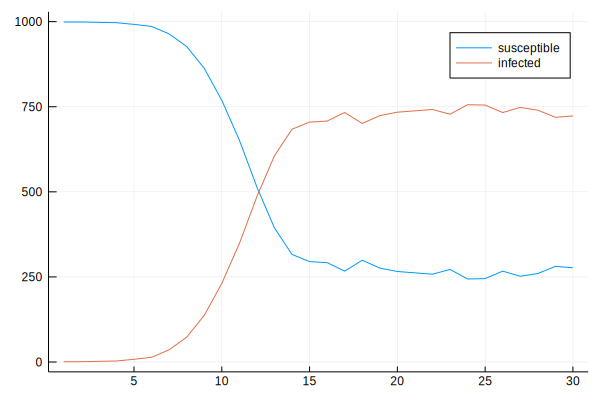

In [20]:
plot(vec(sum(m.states[:susceptible], dims=1)), label=:susceptible)
plot!(vec(sum(m.states[:infected], dims=1)), label=:infected)